# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [103]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv', index=None)

TypeError: parser_f() got an unexpected keyword argument 'index'

In [2]:
# Your work here.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st
%matplotlib inline
import matplotlib.mlab as mlab

In [104]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [107]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [108]:
# Question 1. Is the distribution  of body temperatures normal?
# Body temperature

dft = df['temperature']

In [109]:
dft.head(10)

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
5    99.2
6    98.0
7    98.8
8    98.4
9    98.6
Name: temperature, dtype: float64

In [111]:
#Distribution of body temperatures

In [116]:
mean = np.mean(dft)

In [114]:
std = np.std(dft)

In [117]:
mean

98.24923076923078

In [118]:
std

0.7303577789050377

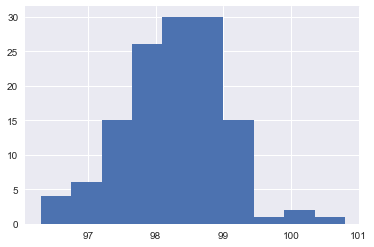

In [125]:
dft.hist(bins = 10)

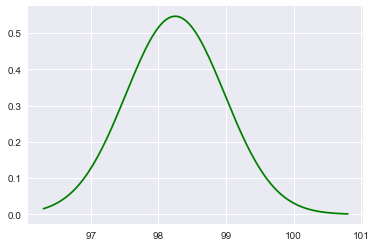

In [131]:
x = np.linspace(min(dft),max(dft),len(dft))
plt.plot(x,mlab.normpdf(x, mean, std), color = 'g')

plt.show()

In [132]:
# Answer 1: The body temperature data looks to be normally distributed. 
# The sample size is large since there are more than 30 data points.
# The observations are independent. 

In [ ]:
# Question 2: Is the true population mean really 98.6 degrees F?

In [133]:
# Answer 2: We hypothesise that the true population mean is 98.6 degrees F.
# We would be using a one sample test since we are looking at one set of data.
# Because the sample size is large (>30), we would be using the Z-statistic test.

In [134]:
zscore = (98.6-mean)/(std/np.sqrt(129))
zscore


5.4548232923640789

In [138]:
pvalue = scipy.stats.norm.sf(abs(zscore))

In [139]:
pvalue

2.4510785070566898e-08

In [140]:
# The P-value here is less than 5%. So, we can reject the null hypothesis that the true population mean is 98.6 degrees F.


In [141]:
# Question 3: In this situation, is it appropriate to use the t or z statistic?

In [142]:
# Answer 3: It is appropriate to use the z statistic because the sample size is greater than 30. If the sample size was 30 or less, it would be appropriate to use the t-statistic test.

In [144]:
tstat = st.t.ppf(1-0.05, 999)

In [145]:
tstat

1.646380345427535

In [146]:
pvalue = scipy.stats.norm.sf(abs(tstat))

In [147]:
pvalue

0.049842738515828225

In [148]:
# The p value is less than 5%. We can again reject the null hypothesis.

In [150]:
# Question 4: At what temperature should we consider someone's temperature to be "abnormal"?
# Confidence interval and margin of error.

In [152]:
ci = st.norm.interval(0.95, loc=mean, scale=std)

In [153]:
ci

(96.81775582674824, 99.680705711713316)

In [154]:
moe = 1.96*(std/np.sqrt(129))
moe

0.12603665700226638

In [155]:
# Question 5: Is there a significant difference between males and females in normal temperature?
# Null hypothesis: There is a significant difference between males and females in normal temperature.

In [161]:
dfm = df[df.gender == 'M']
dff = df[df.gender == 'F']
dfm. head()


,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [162]:
dff.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [168]:
dfm = dfm['temperature']

In [169]:
dfm.head()

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [170]:
dff = dff['temperature']
dff.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

In [176]:
meanm = np.mean(dfm)

In [177]:
meanm

98.1046153846154

In [173]:
meanf = np.mean(dff)
meanf

98.39384615384613

In [178]:
stdm = dfm.std()
stdm

0.6987557623265908

In [179]:
stdf = dff.std()
stdf

0.7434877527313665

In [184]:
zscore_d = ((meanf - meanm)/np.sqrt(stdm/65 + stdf/65))
zscore_d

1.9416988505148356

In [185]:
pvalue_d = scipy.stats.norm.sf(abs(zscore_d))
pvalue_d

0.026086783977408122

In [ ]:
# Since the P value is less than 5%, we can reject the null hypothesis which states that there is a significant difference between males and females in normal temperature.